In [1]:
!pip install opencv-python


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Le

## markdown

In [7]:
model= tf.keras.models.load_model('trained_model.keras')

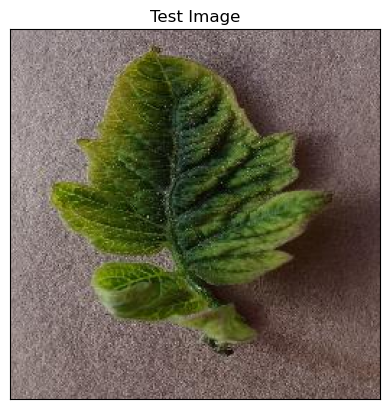

In [9]:
#Test Image Visualization
import cv2
image_path = 'test/test/TomatoYellowCurlVirus1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing model

In [10]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
print(input_arr.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
(1, 128, 128, 3)


In [11]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(array([[1.7479643e-06, 2.0505763e-06, 1.8870996e-05, 9.8209939e-06,
         1.5673180e-08, 8.0480850e-06, 9.0372998e-09, 1.3213947e-06,
         2.9704567e-10, 3.9820492e-07, 2.3176880e-09, 3.1076348e-04,
         5.1501436e-05, 1.5084384e-04, 3.4394949e-07, 1.0035758e-05,
         2.7593205e-06, 1.1876496e-08, 7.3341194e-05, 8.5656225e-08,
         1.8318011e-07, 6.8009004e-04, 1.8739406e-06, 1.9126028e-05,
         2.9683106e-06, 4.4900712e-06, 7.7494630e-04, 5.1110590e-07,
         1.3081927e-03, 1.3541093e-02, 1.0511458e-05, 1.2251840e-04,
         9.5632102e-04, 1.1396855e-03, 1.5870058e-03, 9.7916907e-01,
         3.8882401e-05, 6.2054431e-07]], dtype=float32),
 (1, 38))

In [12]:
result_index=np.argmax(prediction)
result_index

35

In [13]:
class_name=['Apple___Apple_scab', 
            'Apple___Black_rot', 
            'Apple___Cedar_apple_rust', 
            'Apple___healthy', 
            'Blueberry___healthy', 
            'Cherry_(including_sour)___Powdery_mildew', 
            'Cherry_(including_sour)___healthy',
            'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
            'Corn_(maize)___Common_rust_', 
            'Corn_(maize)___Northern_Leaf_Blight',
            'Corn_(maize)___healthy',
            'Grape___Black_rot',
            'Grape___Esca_(Black_Measles)', 
            'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
            'Grape___healthy',
            'Orange___Haunglongbing_(Citrus_greening)',
            'Peach___Bacterial_spot', 
            'Peach___healthy',
            'Pepper,_bell___Bacterial_spot',
            'Pepper,_bell___healthy',
            'Potato___Early_blight', 
            'Potato___Late_blight', 
            'Potato___healthy',
            'Raspberry___healthy', 
            'Soybean___healthy',
            'Squash___Powdery_mildew', 
            'Strawberry___Leaf_scorch',
            'Strawberry___healthy', 
            'Tomato___Bacterial_spot', 
            'Tomato___Early_blight', 
            'Tomato___Late_blight', 
            'Tomato___Leaf_Mold', 
            'Tomato___Septoria_leaf_spot', 
            'Tomato___Spider_mites Two-spotted_spider_mite', 
            'Tomato___Target_Spot', 
            'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
            'Tomato___Tomato_mosaic_virus', 
            'Tomato___healthy']


<function matplotlib.pyplot.show(close=None, block=None)>

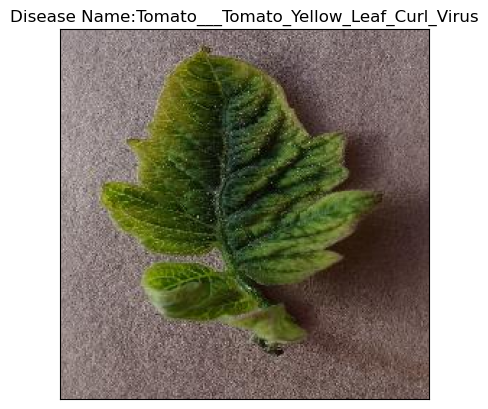

In [14]:
#display result of disease prediction
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name:{model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show

In [15]:
model_prediction

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'